In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_colored_scatter(df, numerical_col, categorical_col):
    plt.figure(figsize=(5, 3))
    sns.scatterplot(
        data=df, 
        x=numerical_col, 
        y='total_users', 
        hue=categorical_col, 
        palette='Set2',
        alpha=0.7
    )
    plt.title(f'Total Users vs {numerical_col} Colored by {categorical_col}')
    plt.xlabel(numerical_col)
    plt.ylabel('Total Users')
    plt.legend(title=categorical_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [48]:
def plot_scatter_with_alpha(df, x_col, y_col, target_col='total_users', 
                            alpha_range=(0.1, 1.0), figsize=(8,6)):
    # Extract arrays
    x = df[x_col].values
    y = df[y_col].values
    t = df[target_col].values.astype(float)
    
    # Normalize target to [0,1]
    t_norm = (t - t.min()) / (t.max() - t.min() + 1e-8)
    # Map to [alpha_min, alpha_max]
    alpha_min, alpha_max = alpha_range
    alphas = alpha_min + t_norm * (alpha_max - alpha_min)
    
    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    scatter = ax.scatter(x, y, alpha=alphas, edgecolor='k', linewidth=0.2)
    
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{y_col} vs {x_col} (alpha ∝ {target_col})')
    return ax

In [16]:
import pandas as pd

df = pd.read_csv('./raw_data/regression-dataset-train.csv')
                 
print(df.head())

    id        date  season_id  year  month  is_holiday  weekday  \
0  577  31-07-2019          3     1      7           0        2   
1  427  03-03-2019          1     1      3           0        6   
2  729  30-12-2019          1     1     12           0        0   
3  483  28-04-2019          2     1      4           0        6   
4  112  22-04-2018          2     0      4           0        5   

   is_workingday  weather_condition  temperature  feels_like_temp  humidity  \
0              1                  1    29.246653          33.1448   70.4167   
1              0                  2    16.980847          20.6746   62.1250   
2              0                  1    10.489153          11.5850   48.3333   
3              0                  2    15.443347          18.8752   48.9583   
4              1                  2    13.803347          16.0977   72.9583   

   wind_speed  total_users  
0   11.083475         7216  
1   10.792293         4066  
2   23.500518         1796  
3    8

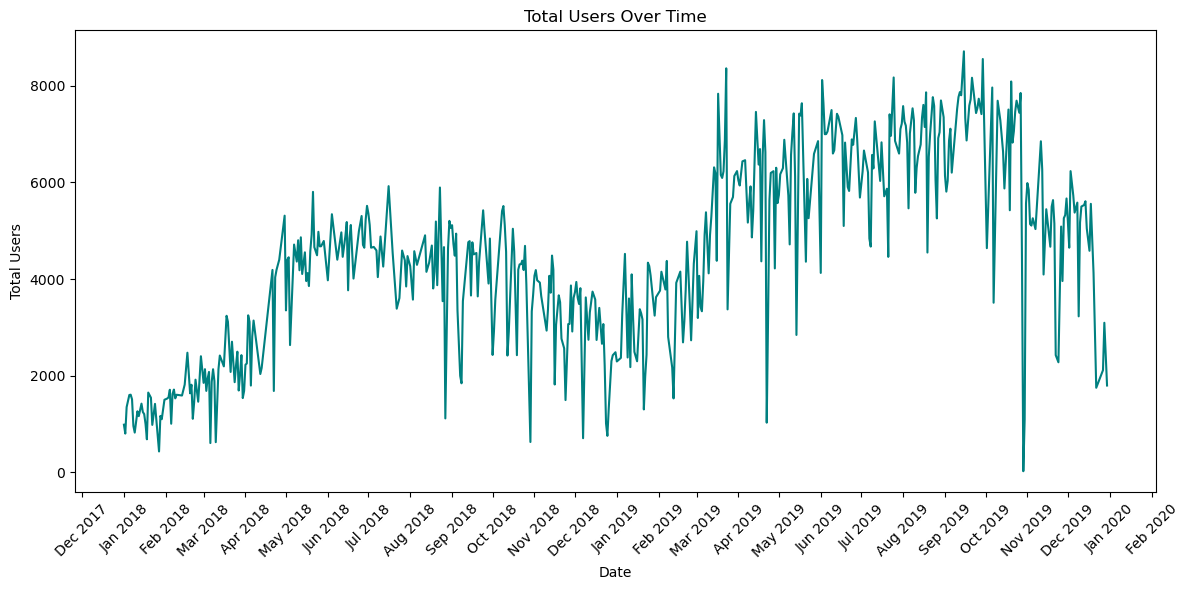

In [609]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Make sure your date column is in datetime format
df['date'] = pd.to_datetime(df['date'], format = "%d-%m-%Y")

# Sort by date to ensure the line is drawn correctly
df = df.sort_values('date')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['total_users'], color='teal')

# Format the x-axis to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every month

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Total Users')
plt.title('Total Users Over Time')
plt.tight_layout()
plt.grid(False)
plt.show()

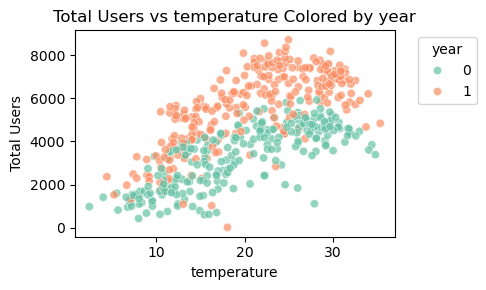

In [89]:
plot_colored_scatter(df, 'temperature', 'year')

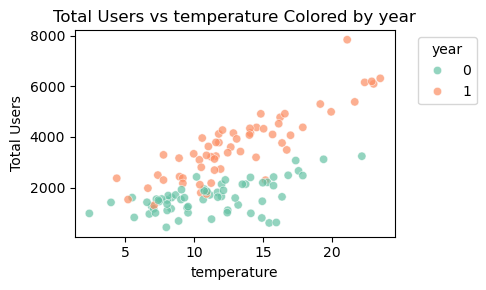

In [87]:
plot_colored_scatter(df[df['season_id'] == 1], 'temperature', 'year')

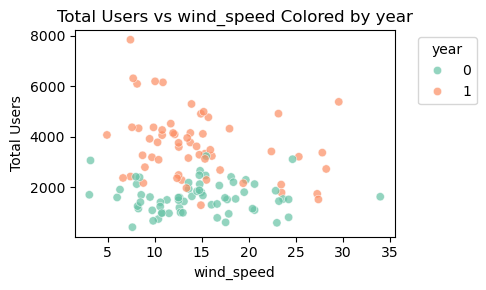

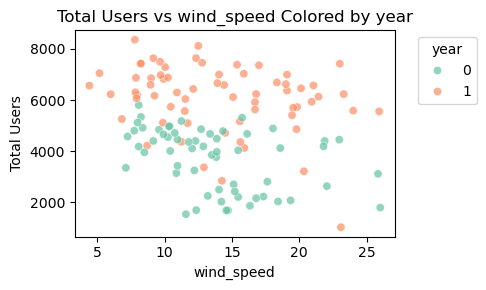

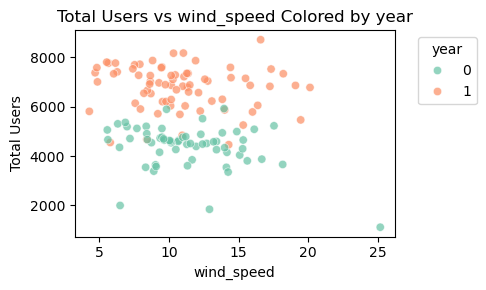

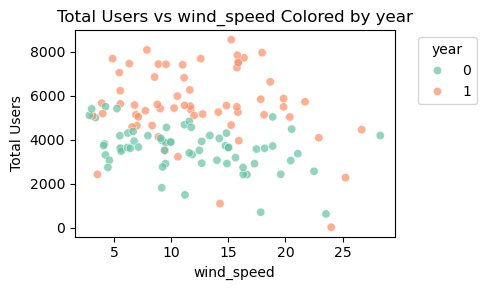

In [90]:
plot_colored_scatter(df[df['season_id'] == 1], 'wind_speed', 'year')
plot_colored_scatter(df[df['season_id'] == 2], 'wind_speed', 'year')
plot_colored_scatter(df[df['season_id'] == 3], 'wind_speed', 'year')
plot_colored_scatter(df[df['season_id'] == 4], 'wind_speed', 'year')

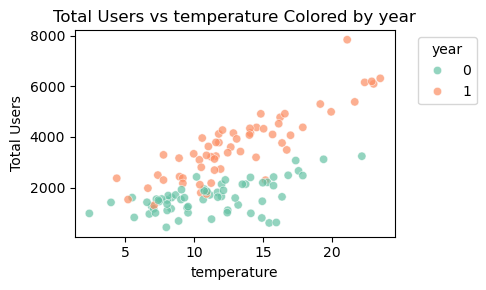

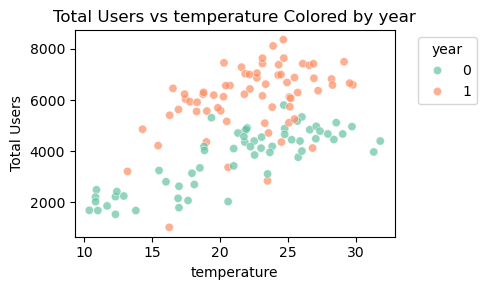

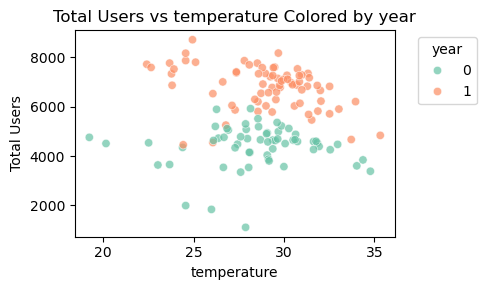

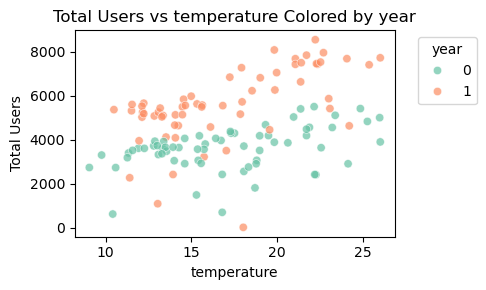

In [92]:
plot_colored_scatter(df[df['season_id'] == 1], 'temperature', 'year')
plot_colored_scatter(df[df['season_id'] == 2], 'temperature', 'year')
plot_colored_scatter(df[df['season_id'] == 3], 'temperature', 'year')
plot_colored_scatter(df[df['season_id'] == 4], 'temperature', 'year')

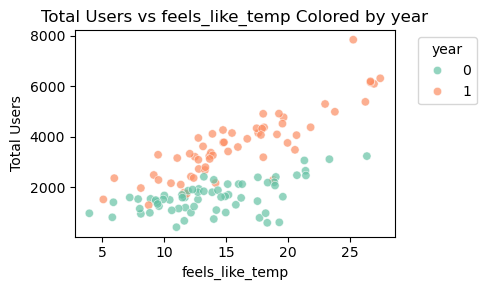

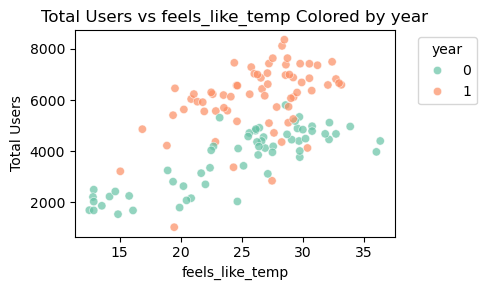

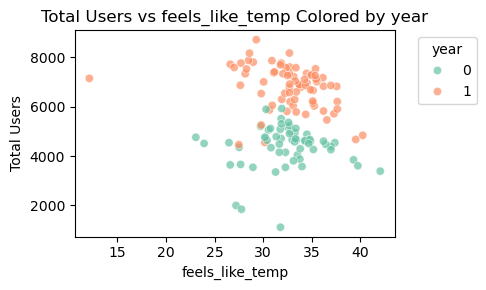

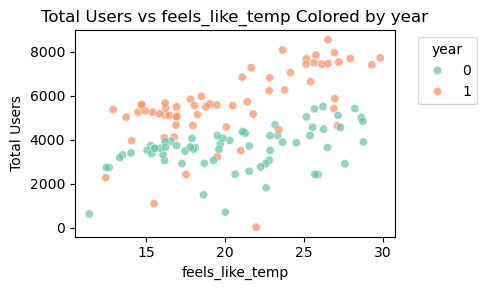

In [93]:
plot_colored_scatter(df[df['season_id'] == 1], 'feels_like_temp', 'year')
plot_colored_scatter(df[df['season_id'] == 2], 'feels_like_temp', 'year')
plot_colored_scatter(df[df['season_id'] == 3], 'feels_like_temp', 'year')
plot_colored_scatter(df[df['season_id'] == 4], 'feels_like_temp', 'year')

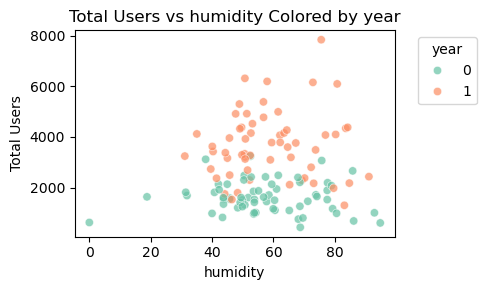

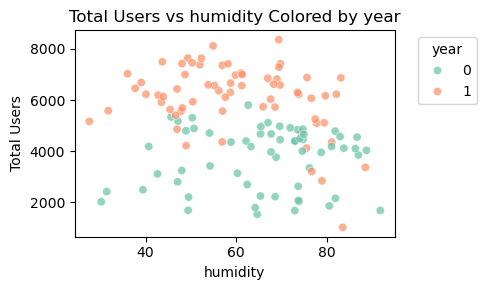

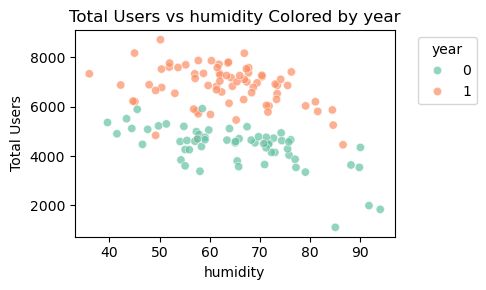

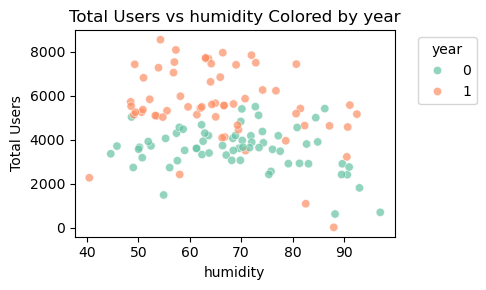

In [94]:
plot_colored_scatter(df[df['season_id'] == 1], 'humidity', 'year')
plot_colored_scatter(df[df['season_id'] == 2], 'humidity', 'year')
plot_colored_scatter(df[df['season_id'] == 3], 'humidity', 'year')
plot_colored_scatter(df[df['season_id'] == 4], 'humidity', 'year')

In [4]:
def add_adjusted_column(df, col_name):
    df = df.copy()
    season_avg= df.groupby('season_id')[col_name].transform('mean')
    df[f'adjusted_{col_name}'] = (df[col_name] - season_avg)
    return df



In [69]:
df = add_adjusted_column(df, 'temperature')
df = add_adjusted_column(df, 'humidity')
df = add_adjusted_column(df, 'wind_speed')
df = add_adjusted_column(df, 'feels_like_temp')

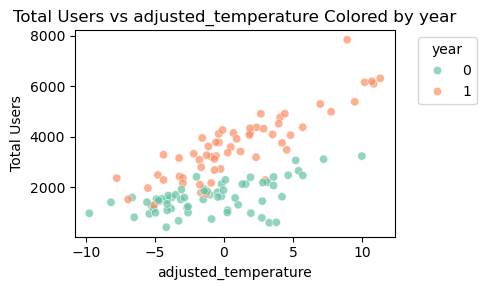

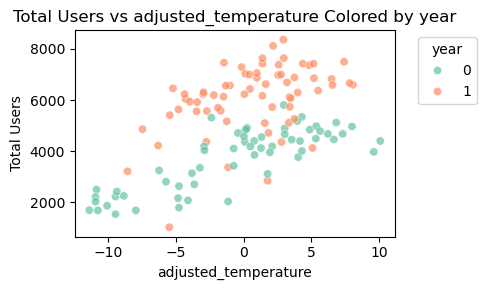

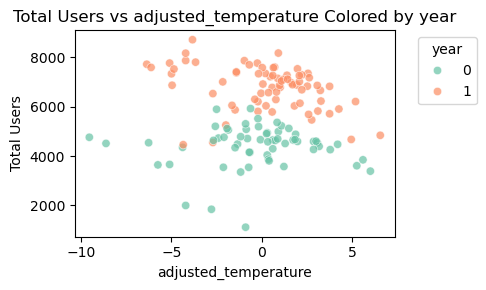

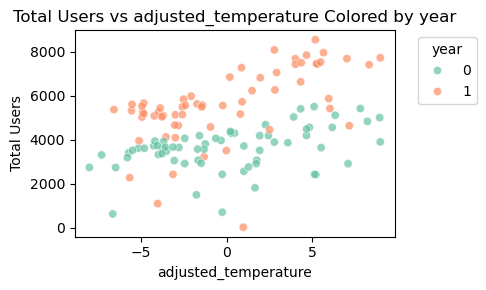

In [95]:
plot_colored_scatter(df[df['season_id'] == 1], 'adjusted_temperature', 'year')
plot_colored_scatter(df[df['season_id'] == 2], 'adjusted_temperature', 'year')
plot_colored_scatter(df[df['season_id'] == 3], 'adjusted_temperature', 'year')
plot_colored_scatter(df[df['season_id'] == 4], 'adjusted_temperature', 'year')

In [70]:
df['temp_humid'] = df['adjusted_temperature'] * df['humidity']

In [71]:
df['temp_minus_feels'] = df['temperature'] - df['feels_like_temp']

<Axes: title={'center': 'adjusted_feels_like_temp vs adjusted_humidity (alpha ∝ total_users)'}, xlabel='adjusted_humidity', ylabel='adjusted_feels_like_temp'>

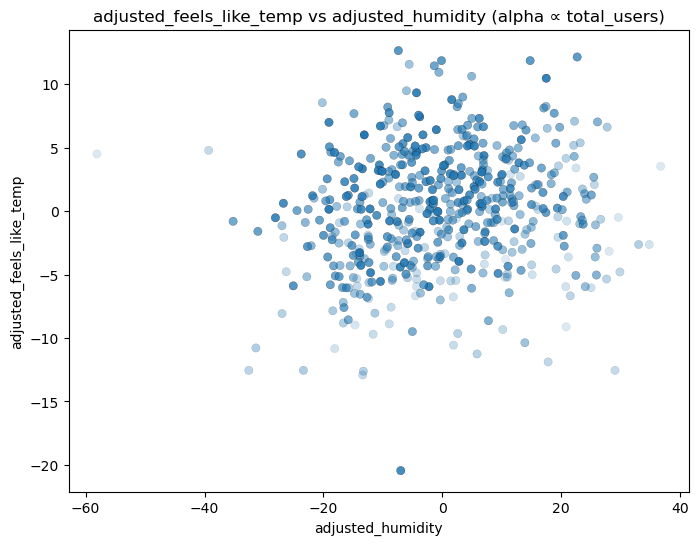

In [73]:
plot_scatter_with_alpha(df, 'adjusted_humidity', 'adjusted_feels_like_temp')

<Axes: title={'center': 'month vs temperature (alpha ∝ total_users)'}, xlabel='temperature', ylabel='month'>

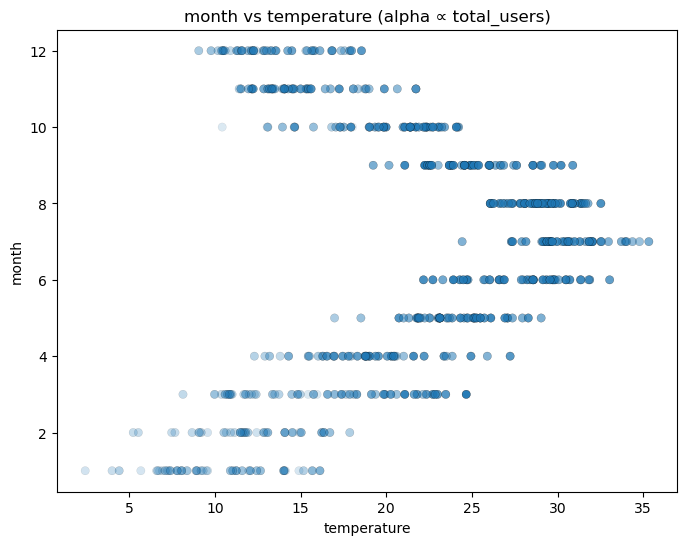

In [79]:
plot_scatter_with_alpha(df, 'temperature', 'month')

<Axes: title={'center': 'weekday vs temp_humid (alpha ∝ total_users)'}, xlabel='temp_humid', ylabel='weekday'>

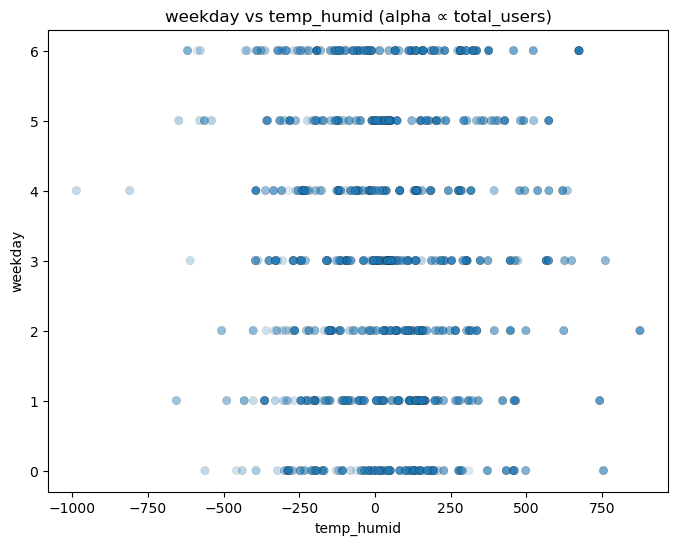

In [80]:
plot_scatter_with_alpha(df, 'temp_humid', 'weekday')

In [82]:
print(len(df[df['is_holiday']==1]))
print(df[df['is_holiday']==1])

13
      id        date  season_id  year  month  is_holiday  weekday  \
35   328  24-11-2018          4     0     11           1        4   
45   471  16-04-2019          2     1      4           1        1   
47   681  12-11-2019          4     1     11           1        1   
69   611  03-09-2019          3     1      9           1        1   
94    52  21-02-2018          1     0      2           1        1   
95   360  26-12-2018          1     0     12           1        1   
96   283  10-10-2018          4     0     10           1        1   
189  381  16-01-2019          1     1      1           1        1   
273  248  05-09-2018          3     0      9           1        1   
348  691  22-11-2019          4     1     11           1        4   
402   17  17-01-2018          1     0      1           1        1   
430  315  11-11-2018          4     0     11           1        5   
492  416  20-02-2019          1     1      2           1        1   

     is_workingday  weather_co

In [6]:
import numpy as np
import pandas as pd

def add_cyclical_feature(df: pd.DataFrame, col: str, period: int) -> pd.DataFrame:
    df = df.copy()
    radians = 2 * np.pi * df[col] / period
    df[f'{col}_sin'] = np.sin(radians)
    df[f'{col}_cos'] = np.cos(radians)
    return df

# Example usage on your bike‐rental DataFrame:
df = add_cyclical_feature(df, 'month', 12)
df = add_cyclical_feature(df, 'weekday', 7)

# Now df has 'month_sin', 'month_cos', 'weekday_sin', and 'weekday_cos'

In [84]:
print(df.head())

    id        date  season_id  year  month  is_holiday  weekday  \
0  577  31-07-2019          3     1      7           0        2   
1  427  03-03-2019          1     1      3           0        6   
2  729  30-12-2019          1     1     12           0        0   
3  483  28-04-2019          2     1      4           0        6   
4  112  22-04-2018          2     0      4           0        5   

   is_workingday  weather_condition  temperature  ...  adjusted_temperature  \
0              1                  1    29.246653  ...              0.469983   
1              0                  2    16.980847  ...              4.815812   
2              0                  1    10.489153  ...             -1.675882   
3              0                  2    15.443347  ...             -6.298727   
4              1                  2    13.803347  ...             -7.938727   

   temp_humid  temp_minus_feels  adjusted_humidity  adjusted_wind_speed  \
0   33.094673         -3.898147           6.347

# interesting experiment


In [7]:
def add_sqaured_feature (df, features, x):
    for f in features:
        n = 1
        for i in range(x):
            n *= df[f]
        df[f"{f}_{x}"] = n
    
    return df

def add_triple_feature (df, features):
    for f in features:
        df[f"{f}_triple"] = df[f] * df[f] * df[f]
    
    return df

In [146]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import HuberRegressor

def per_group_linear_mse(df, the_list):
    """
    Splits df by year ∈ {0,1} and season_id ∈ unique quarters,
    fits TotalUsers ~ Temperature in each subset,
    and returns a DataFrame of MSEs.
    """
    records = []
    years   = sorted(df['year'].unique())
    seasons = sorted(df['season_id'].unique())
    
    for year in years:
        for season in seasons:
            sub = df[(df['year'] == year) & (df['season_id'] == season)]
            # skip tiny groups
            if len(sub) < 2:
                mse = float('nan')
            else:
                X = sub[the_list].values
                y = sub['total_users'].values
                lr = LinearRegression().fit(X, y)
                y_pred = lr.predict(X)
                
#                 hub = HuberRegressor().fit(X, y)
#                 y_pred = hub.predict(X)
                mse = mean_squared_error(y, y_pred)
            records.append({
                'year': year,
                'season_id': season,
                'n_rows': len(sub),
                'mse': mse
            })
    df_grp = pd.DataFrame(records).dropna(subset=['mse'])
    total_n = df_grp['n_rows'].sum()
    weighted_mse = (df_grp['n_rows'] * df_grp['mse']).sum() / total_n

    records.append({
        'year':      'all',
        'season_id': 'all',
        'n_rows':    total_n,
        'mse':       weighted_mse
    })
    return pd.DataFrame(records)

# Usage:
df = pd.read_csv('./raw_data/regression-dataset-train.csv')
df['temp_minus_feels'] = df['temperature'] - df['feels_like_temp']
df = df.dropna(subset=['year','season_id','temperature','total_users'])
df = add_adjusted_column(df, 'temperature')
df = add_adjusted_column(df, 'humidity')
df = add_adjusted_column(df, 'wind_speed')
df = add_adjusted_column(df, 'feels_like_temp')
df = add_cyclical_feature(df, 'month', 12)
df = add_cyclical_feature(df, 'weekday', 7)

chosen_features = ['temperature', 'wind_speed', 'temp_minus_feels', 'feels_like_temp', 'adjusted_temperature',
                                         'adjusted_wind_speed', 'adjusted_feels_like_temp', 'adjusted_humidity', 'weather_condition',
                                        'weekday_sin', 'weekday_cos','month_cos', 'month_sin', 'is_holiday']
chosen_features = ['temperature', 'wind_speed', 'temp_minus_feels', 'weather_condition',
                                        'weekday_sin', 'weekday_cos','month_cos', 'month_sin', 'is_holiday']
x=3
for i in range(x):
    df = add_sqaured_feature(df, chosen_features, i)

    final_features = []
for f in chosen_features:
    final_features.append(f)
    for i in range(x):
        final_features.append(f"{f}_{i}")

results = []
results.append(per_group_linear_mse(df, ['temperature']))
results.append(per_group_linear_mse(df, ['wind_speed']))
results.append(per_group_linear_mse(df, ['temp_minus_feels']))
results.append(per_group_linear_mse(df, ['humidity']))
results.append(per_group_linear_mse(df, final_features))

for result in results:
    print(
        result.to_string(
            index=False,
            float_format='{:,.0f}'.format  # or '{:,.2f}' for two decimals
        )
    )

year season_id  n_rows       mse
   0         1      65   253,037
   0         2      60   470,282
   0         3      61   724,118
   0         4      65   774,285
   1         1      59   436,148
   1         2      66 1,365,650
   1         3      73   664,120
   1         4      61 1,828,960
 all       all     510   813,876
year season_id  n_rows       mse
   0         1      65   377,280
   0         2      60 1,155,294
   0         3      61   644,489
   0         4      65   808,562
   1         1      59 1,546,593
   1         2      66 1,550,572
   1         3      73   749,533
   1         4      61 2,658,809
 all       all     510 1,169,022
year season_id  n_rows       mse
   0         1      65   309,154
   0         2      60   680,314
   0         3      61   725,063
   0         4      65   810,055
   1         1      59   805,070
   1         2      66 1,326,925
   1         3      73   755,341
   1         4      61 2,115,801
 all       all     510   935,444
year seaso

In [157]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import HuberRegressor

def per_group_linear_mse(df, the_list):
    """
    Splits df by year ∈ {0,1} and season_id ∈ unique quarters,
    fits TotalUsers ~ Temperature in each subset,
    and returns a DataFrame of MSEs.
    """
    records = []
    years   = sorted(df['year'].unique())
    seasons = sorted(df['season_id'].unique())
    
    for year in years:
        for season in seasons:
            sub = df[(df['year'] == year) & (df['season_id'] == season)]
            # skip tiny groups
            if len(sub) < 2:
                mse = float('nan')
            else:
                X = sub[the_list].values
                y = sub['total_users'].values
                lr = LinearRegression().fit(X, y)
                y_pred = lr.predict(X)
                
#                 hub = HuberRegressor().fit(X, y)
#                 y_pred = hub.predict(X)
                mse = mean_squared_error(y, y_pred)
            records.append({
                'year': year,
                'season_id': season,
                'n_rows': len(sub),
                'mse': mse
            })
    df_grp = pd.DataFrame(records).dropna(subset=['mse'])
    total_n = df_grp['n_rows'].sum()
    weighted_mse = (df_grp['n_rows'] * df_grp['mse']).sum() / total_n

    records.append({
        'year':      'all',
        'season_id': 'all',
        'n_rows':    total_n,
        'mse':       weighted_mse
    })
    return pd.DataFrame(records)

# Usage:
df = pd.read_csv('./raw_data/regression-dataset-train.csv')
df['temp_minus_feels'] = df['temperature'] - df['feels_like_temp']
df = df.dropna(subset=['year','season_id','temperature','total_users'])
df = add_adjusted_column(df, 'temperature')
df = add_adjusted_column(df, 'humidity')
df = add_adjusted_column(df, 'wind_speed')
df = add_adjusted_column(df, 'feels_like_temp')
df = add_cyclical_feature(df, 'month', 12)
df = add_cyclical_feature(df, 'weekday', 7)

chosen_features = ['temperature', 'wind_speed', 'temp_minus_feels', 'weather_condition',
                                        'weekday_sin', 'weekday_cos','month_cos', 'month_sin', 'is_holiday']
x=7
for i in range(x):
    df = add_sqaured_feature(df, chosen_features, i)

    final_features = []
for f in chosen_features:
    final_features.append(f)
    for i in range(x):
        final_features.append(f"{f}_{i}")

results = []
results.append(per_group_linear_mse(df, final_features))

for result in results:
    print(
        result.to_string(
            index=False,
            float_format='{:,.0f}'.format  # or '{:,.2f}' for two decimals
        )
    )

year season_id  n_rows     mse
   0         1      65  63,497
   0         2      60  94,104
   0         3      61  90,372
   0         4      65 119,701
   1         1      59 171,338
   1         2      66 478,500
   1         3      73 193,914
   1         4      61 425,508
 all       all     510 205,624


# Model Creation

In [772]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df = pd.read_csv('./raw_data/regression-dataset-train.csv')
df['temp_minus_feels'] = df['temperature'] - df['feels_like_temp']
df = df.dropna(subset=['year','season_id','temperature','total_users'])
df = add_adjusted_column(df, 'temperature')
df = add_adjusted_column(df, 'humidity')
df = add_adjusted_column(df, 'wind_speed')
df = add_adjusted_column(df, 'feels_like_temp')
df = add_cyclical_feature(df, 'month', 12)
df = add_cyclical_feature(df, 'weekday', 7)

In [773]:
from sklearn.model_selection import train_test_split

# chosen_features = ['temperature', 'wind_speed', 'temp_minus_feels', 'weather_condition',
#                                         'weekday_sin', 'weekday_cos','month_cos', 'month_sin', 'is_holiday']
# chosen_features = ['temperature', 'wind_speed', 'temp_minus_feels', 'feels_like_temp', 'adjusted_temperature',
#                                          'adjusted_wind_speed', 'adjusted_feels_like_temp', 'adjusted_humidity',
#                                         'weekday_sin', 'month_sin']

chosen_features = ['temperature', 'wind_speed', 'temp_minus_feels', 'feels_like_temp', 'adjusted_temperature',
                                         'adjusted_wind_speed', 'adjusted_feels_like_temp', 'adjusted_humidity', 'weather_condition',
                                        'weekday_sin', 'weekday_cos','month_cos', 'month_sin', 'is_holiday']

x=2
for i in range(x):
    df = add_sqaured_feature(df, chosen_features, i)

final_features = []
for f in chosen_features:
    final_features.append(f)
    for i in range(x):
        final_features.append(f"{f}_{i}")



train_df, eval_df = train_test_split(
            df, test_size= 0.2,
            random_state = 42,
            stratify=df['season_id'].astype(str) + "_" + df['year'].astype(str)
        )
# train_df = df

X_train = train_df[final_features].dropna()
y_train = train_df.loc[X_train.index, 'total_users']

X_eval  = eval_df[final_features].dropna()
y_eval  = eval_df.loc[X_eval.index,   'total_users']

In [356]:
from xgboost import XGBRegressor

the_model_dict ={0 : None, 1 : None}

for year in [0,1]:
    the_year_dict  = {1 : None, 2 : None, 3 : None, 4 : None}
    for season_id in [1,2,3,4]:
        subset = train_df.loc[
            (train_df['season_id'] == season_id) &
            (train_df['year']      == year),
            :
        ]
        X_train = subset[final_features].dropna()
        y_train = subset.loc[X_train.index, 'total_users']
#         lr = LinearRegression().fit(X_train, y_train)
        xgb = XGBRegressor(
            objective='reg:squarederror',
            n_estimators=50,
            learning_rate=0.1,
            max_depth=5,
            random_state=42,
            verbosity=1
        )
        xgb.fit(X_train, y_train)
        the_year_dict[season_id] = xgb
#         the_year_dict[season_id] = lr
    
    the_model_dict[year] = the_year_dict
    
# xgb = XGBRegressor(
#     objective='reg:squarederror',
#     n_estimators=100,
#     learning_rate=0.1,
#     max_depth=6,
#     random_state=42,
#     verbosity=1
# )
# xgb.fit(X_train, y_train,
#         eval_set=[(X_train, y_train), (X_eval, y_eval)],
# #         early_stopping_rounds=10,
#         verbose=False)

# # 4) Predict & evaluate
# y_pred = xgb.predict(X_eval)
# mse = mean_squared_error(y_eval, y_pred)

# print(f"XGBoost MSE on eval set: {mse:.2f}")

In [406]:
from sklearn.ensemble import RandomForestRegressor

the_model_dict = {0: None, 1: None}

for year in [0, 1]:
    the_year_dict = {1: None, 2: None, 3: None, 4: None}
    for season_id in [1, 2, 3, 4]:
        subset = train_df.loc[
            (train_df['season_id'] == season_id) &
            (train_df['year'] == year),
            :
        ]
        X_train = subset[final_features].dropna()
        y_train = subset.loc[X_train.index, 'total_users']

        rf = RandomForestRegressor(
            n_estimators=200,
            max_depth=8,
            random_state=42,
            n_jobs=-1,
            verbose=0
        )
        rf.fit(X_train, y_train)
        the_year_dict[season_id] = rf

    the_model_dict[year] = the_year_dict


In [407]:
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate_per_group_models(eval_df, model_dict, feature_cols):
    y_true_all = []
    y_pred_all = []
    
    # Loop over each year and season in your model dict
    for year, seasons in model_dict.items():
        for season_id, model in seasons.items():
            if model is None:
                continue
            
            # select the eval rows for this (year, season)
            mask = (eval_df['year'] == year) & (eval_df['season_id'] == season_id)
            sub = eval_df.loc[mask, feature_cols + ['total_users']]
            if sub.empty:
                continue
            
            # drop any rows with missing features
            X_sub = sub[feature_cols].dropna()
            y_sub = sub.loc[X_sub.index, 'total_users']
            if len(y_sub) == 0:
                continue
            
            # predict
            preds = model.predict(X_sub)
            
            y_true_all.append(y_sub.values)
            y_pred_all.append(preds)
    
    # concatenate across all groups
    y_true = np.concatenate(y_true_all)
    y_pred = np.concatenate(y_pred_all)
    
    # overall MSE
    return mean_squared_error(y_true, y_pred)

# --- usage ---
mse_eval = evaluate_per_group_models(eval_df, the_model_dict, final_features)
print(f"Overall eval MSE (per-(year,season) XGB): {mse_eval:.2f}")


Overall eval MSE (per-(year,season) XGB): 661869.70


# Create Results

In [393]:
df = pd.read_csv('./raw_data/regression-dataset-test-unlabeled.csv')
df['temp_minus_feels'] = df['temperature'] - df['feels_like_temp']
df = add_adjusted_column(df, 'temperature')
df = add_adjusted_column(df, 'humidity')
df = add_adjusted_column(df, 'wind_speed')
df = add_adjusted_column(df, 'feels_like_temp')
df = add_cyclical_feature(df, 'month', 12)
df = add_cyclical_feature(df, 'weekday', 7)

In [394]:
chosen_features = ['temperature', 'wind_speed', 'temp_minus_feels', 'feels_like_temp', 'adjusted_temperature',
                                         'adjusted_wind_speed', 'adjusted_feels_like_temp', 'adjusted_humidity', 'weather_condition',
                                        'weekday_sin', 'weekday_cos','month_cos', 'month_sin', 'is_holiday']
x=2
for i in range(x):
    df = add_sqaured_feature(df, chosen_features, i)

final_features = []
for f in chosen_features:
    final_features.append(f)
    for i in range(x):
        final_features.append(f"{f}_{i}")

In [395]:
preds = np.full(len(df), np.nan)

# 2) Loop over each model and assign its predictions
for year, seasons in the_model_dict.items():
    for season_id, model in seasons.items():
        if model is None:
            continue
        mask = (df['year'] == year) & (df['season_id'] == season_id)
        if not mask.any():
            continue
        X_sub = df.loc[mask, final_features].dropna()
        if X_sub.empty:
            continue
        sub_preds = model.predict(X_sub)
        preds[X_sub.index] = sub_preds

# 3) Attach predictions and save
df['prediction'] = preds
output = df[['id', 'prediction']]
output.to_csv('predictions.csv', index=False)
print("Saved predictions to /mnt/data/predictions.csv")

Saved predictions to /mnt/data/predictions.csv


# Training One Model For the Whole Thing


In [672]:
df.to_csv('test.csv')

In [719]:
import holidays
from bisect import bisect_left
import numpy as np

def add_holiday_distances(df):
    # Ensure 'date' is datetime
    df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y", errors='coerce')

    # Create a sorted list of US holiday dates as pd.Timestamp
    us_holiday_dict = holidays.US(years=range(df['date'].dt.year.min() - 1,
                                              df['date'].dt.year.max() + 2))
    us_holiday_dates = sorted(pd.to_datetime(list(us_holiday_dict.keys())))

    # Function to find distance to the previous and next holiday
    def find_holiday_deltas(date):
        pos = bisect_left(us_holiday_dates, date)
        prev_holiday = us_holiday_dates[pos - 1] if pos > 0 else None
        next_holiday = us_holiday_dates[pos] if pos < len(us_holiday_dates) else None

        days_to_prev = (date - prev_holiday).days if prev_holiday else np.nan
        days_to_next = (next_holiday - date).days if next_holiday else np.nan

        return pd.Series([days_to_prev, days_to_next])

    # Apply to DataFrame
    df[['days_to_prev_holiday', 'days_to_next_holiday']] = df['date'].apply(find_holiday_deltas)
    
    return df


In [720]:
def add_us_holidays(df):
    # Ensure 'date' is in datetime format
    df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y", errors='coerce')
    
    # Create a US holidays calendar
    us_holidays = holidays.US()

    # Add a new column 'is_us_holiday' that is 1 if the date is a holiday, else 0
    df['is_us_holiday'] = df['date'].isin(us_holidays).astype(int)
    
    return df

In [721]:
def add_corona_data(df):
    df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y")
    df['corona'] = (df['date'] >= pd.to_datetime("2019-11-01")).astype(int)
    return df

In [722]:
def one_hot_encode_season(df, column):

    if column not in df.columns:
        raise ValueError("Input DataFrame must contain a 'season_id' column.")
    
    season_dummies = pd.get_dummies(df[column], prefix=column)
    df = df.drop(columns=column)
    df = pd.concat([df, season_dummies], axis=1)
    
    return df

In [723]:
import math

def estimate_daylight_hours(month, latitude=40.7128):  # New York default
    declination = -23.44 * math.cos(math.radians(360 / 12 * (month + 1)))
    daylight_hours = 24 - (24 / math.pi) * math.acos(
        min(1, max(-1, -math.tan(math.radians(latitude)) * math.tan(math.radians(declination))))
    )
    return daylight_hours


In [762]:
def add_week_cyclical_feature(df):
    # Ensure datetime format
    df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y", errors='coerce')

    # Extract ISO week number (1–52 or 53)
    df['week_of_year'] = df['date'].dt.isocalendar().week

    # Normalize into [0, 2π] and apply sine/cosine
    df['week_sin'] = np.sin(2 * np.pi * df['week_of_year'] / 52)
    df['week_cos'] = np.cos(2 * np.pi * df['week_of_year'] / 52)

    return df

In [783]:
def add_seasonal_index(df):
    # Ensure 'date' column is datetime
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

    # Add day of month
    df['day'] = df['date'].dt.day

    # Cyclical encoding for day in month (assume 31 days max)
    df['day_in_month_sin'] = np.sin(2 * np.pi * df['day'] / 31)
    df['day_in_month_cos'] = np.cos(2 * np.pi * df['day'] / 31)

    # Optional: check that 'week_sin' and 'weekday_sin' already exist
    if not {'week_sin', 'weekday_sin'}.issubset(df.columns):
        raise ValueError("Missing 'week_sin' or 'weekday_sin' columns. Add them before using this function.")

    # Add the seasonal index
    df['seasonal_index'] = df['week_sin'] + df['weekday_sin'] + df['day_in_month_sin']

    return df

In [1005]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df = pd.read_csv('./raw_data/regression-dataset-train.csv')
df['temp_minus_feels'] = df['temperature'] - df['feels_like_temp']
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)
df['temp_x_humidity'] = df['temperature'] * df['humidity']
df['wind_feels_diff'] = df['wind_speed'] * df['temp_minus_feels']
df['is_winter_break'] = df['month'].isin([12, 1]).astype(int)
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y")
df['is_thanksgiving_week'] = df['date'].dt.strftime('%m-%d').between('11-20', '11-30').astype(int)
df['estimated_daylight_hours'] = df['month'].apply(estimate_daylight_hours)
df = df.dropna(subset=['year','season_id','temperature','total_users'])
df = add_adjusted_column(df, 'temperature')
df = add_adjusted_column(df, 'humidity')
df = add_adjusted_column(df, 'wind_speed')
df = add_adjusted_column(df, 'feels_like_temp')
df = add_cyclical_feature(df, 'month', 12)
df = add_cyclical_feature(df, 'weekday', 7)
df = one_hot_encode_season(df, 'season_id')
df = one_hot_encode_season(df, 'weather_condition')
df = add_corona_data(df)
df = add_us_holidays(df)
df = add_holiday_distances(df)
df = add_week_cyclical_feature(df)
df['week_sin_x_temp'] = df['week_sin'] * df['temperature']
df['week_sin_x_humidity'] = df['week_sin'] * df['humidity']
df = add_seasonal_index(df)

In [1006]:
from sklearn.model_selection import train_test_split

# chosen_features = ['temperature', 'wind_speed', 'temp_minus_feels', 'weather_condition',
#                                         'weekday_sin', 'weekday_cos','month_cos', 'month_sin', 'is_holiday']
# chosen_features = ['temperature', 'wind_speed', 'temp_minus_feels', 'feels_like_temp', 'adjusted_temperature',
#                                          'adjusted_wind_speed', 'adjusted_feels_like_temp', 'adjusted_humidity',
#                                         'weekday_sin', 'month_sin']

chosen_features = ['year','temperature', 'wind_speed', 'temp_minus_feels', 'feels_like_temp', 'adjusted_temperature',
                    'adjusted_wind_speed', 'adjusted_feels_like_temp', 'adjusted_humidity',
                    'season_id_1','season_id_2', 'season_id_3', 'season_id_4', 'weekday_sin', 'weekday_cos','month_cos', 'month_sin',
                   'weather_condition_1', 'weather_condition_2', 'weather_condition_3','is_holiday', 'corona', 'is_us_holiday',
                  'days_to_prev_holiday', 'days_to_next_holiday', 'is_weekend', 'temp_x_humidity', 'wind_feels_diff',
                  'is_winter_break', 'is_thanksgiving_week', 'estimated_daylight_hours', 'week_sin', 'week_cos', 'week_of_year',
                  'week_sin_x_temp', 'week_sin_x_humidity', 'seasonal_index']

#top 0.005
# chosen_features = ['temperature', 'year', 'feels_like_temp', 'adjusted_humidity', 'wind_feels_diff', 'week_sin_x_temp', 'week_sin', 'week_sin_x_humidity', 'temp_minus_feels', 'weather_condition_3', 'seasonal_index', 'temp_x_humidity', 'week_of_year', 'wind_speed', 'days_to_next_holiday', 'corona', 'days_to_prev_holiday', 'adjusted_wind_speed']


#top 0.001
# chosen_features = ['temperature', 'year', 'feels_like_temp', 'adjusted_humidity', 'week_sin_x_temp', 'week_sin_x_humidity', 'week_sin', 'corona', 'week_of_year', 'weather_condition_3', 'temp_minus_feels', 'weather_condition_1', 'season_id_4', 'season_id_1', 'seasonal_index', 'wind_speed', 'temp_x_humidity']


x=1
for i in range(x):
    df = add_sqaured_feature(df, chosen_features, i)

final_features = []
for f in chosen_features:
    final_features.append(f)
    for i in range(x):
        final_features.append(f"{f}_{i}")



train_df, eval_df = train_test_split(
            df, test_size= 0.15,
            random_state = 42,
        )
# train_df = df

X_train = train_df[final_features].dropna()
y_train = train_df.loc[X_train.index, 'total_users']

X_eval  = eval_df[final_features].dropna()
y_eval  = eval_df.loc[X_eval.index,   'total_users']

In [999]:
from sklearn.ensemble import RandomForestRegressor
def create_best_model(X_train, y_train, X_eval, y_eval):
    best_i = 0
    best_d = 0
    best_mse = 1000000000
    for i in range(200,2000,200):
        for d in range(2,7,1):
#             rf = RandomForestRegressor(
#                         n_estimators=i,
#                         max_depth=d,
#                         random_state=42,
#                         n_jobs=-1,
#                         verbose=0
#                     )
#             rf.fit(X_train, y_train)
            xgb = XGBRegressor(
                        objective='reg:squarederror',
                        n_estimators=i,
                        learning_rate=0.01,
                        max_depth=d,
                        random_state=42,
                        verbosity=1
                    )
            xgb.fit(X_train, y_train)
#             y_pred = rf.predict(X_eval)
            y_pred = xgb.predict(X_eval)
            mse = mean_squared_error(y_eval, y_pred)
            if(mse < best_mse):
                best_mse = mse
                best_i=i
                best_d=d
            print("i,d= ", i , d,  "mse = ", mean_squared_error(y_eval, y_pred))
    print("best restult" , best_i, best_d, best_mse)
    return [best_i, best_d]

In [1000]:
best_i, best_d = create_best_model(X_train, y_train, X_eval, y_eval)

i,d=  200 2 mse =  890606.5440826191
i,d=  200 3 mse =  690391.0359550569
i,d=  200 4 mse =  592444.2666212905
i,d=  200 5 mse =  534487.4721462419
i,d=  200 6 mse =  585820.321549631
i,d=  400 2 mse =  535094.749254591
i,d=  400 3 mse =  437261.47255909943
i,d=  400 4 mse =  413354.31545831147
i,d=  400 5 mse =  408618.93430856254
i,d=  400 6 mse =  489548.89487914357
i,d=  600 2 mse =  458562.0203793583
i,d=  600 3 mse =  394564.67646831716
i,d=  600 4 mse =  392253.90858104767
i,d=  600 5 mse =  395317.09959846234
i,d=  600 6 mse =  474186.7340361621
i,d=  800 2 mse =  412127.2336699767
i,d=  800 3 mse =  375374.9588919514
i,d=  800 4 mse =  392268.32627816283
i,d=  800 5 mse =  389497.8279892005
i,d=  800 6 mse =  473286.4226019653
i,d=  1000 2 mse =  389436.8219525311
i,d=  1000 3 mse =  365017.0477333783
i,d=  1000 4 mse =  394730.0233694853
i,d=  1000 5 mse =  390703.79828763026
i,d=  1000 6 mse =  473406.53516434116
i,d=  1200 2 mse =  375213.8619715287
i,d=  1200 3 mse =  3602

In [978]:
best_i, best_d = create_best_model(X_train, y_train, X_eval, y_eval)

i,d=  20 2 mse =  798120.7858068031
i,d=  20 3 mse =  634417.2107951478
i,d=  20 4 mse =  549626.2927228431
i,d=  20 5 mse =  503195.50488512043
i,d=  20 6 mse =  536189.1594620753
i,d=  40 2 mse =  510810.85595648724
i,d=  40 3 mse =  427091.3031715139
i,d=  40 4 mse =  410470.4519786773
i,d=  40 5 mse =  405248.21785045054
i,d=  40 6 mse =  461152.90299345995
i,d=  60 2 mse =  444460.8919337715
i,d=  60 3 mse =  397674.5541690594
i,d=  60 4 mse =  385212.1842871066
i,d=  60 5 mse =  392277.8360807588
i,d=  60 6 mse =  452729.85493375553
i,d=  80 2 mse =  399928.75005676626
i,d=  80 3 mse =  383351.4308749503
i,d=  80 4 mse =  383450.8417347209
i,d=  80 5 mse =  398312.9017451178
i,d=  80 6 mse =  456354.5038259
i,d=  100 2 mse =  373388.00793130347
i,d=  100 3 mse =  370773.3265525979
i,d=  100 4 mse =  379617.85772241786
i,d=  100 5 mse =  398897.5588684649
i,d=  100 6 mse =  462213.7000543516
i,d=  120 2 mse =  360996.6680229645
i,d=  120 3 mse =  362232.82566905854
i,d=  120 4 mse

In [983]:
train_df = df

X_train = train_df[final_features].dropna()
y_train = train_df.loc[X_train.index, 'total_users']
rf = RandomForestRegressor(
                        n_estimators=best_i,
                        max_depth=best_d,
                        random_state=42
                        n_jobs=-1,
                        verbose=0
                    )
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [1007]:
train_df = df
X_train = train_df[final_features].dropna()
y_train = train_df.loc[X_train.index, 'total_users']

xgb = XGBRegressor(
                        objective='reg:squarederror',
                        n_estimators=best_i,
                        learning_rate=0.1,
                        max_depth=best_d,
                        random_state=42,
                        verbosity=1
                    )
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [1001]:
train_df = df
X_train = train_df[final_features].dropna()
y_train = train_df.loc[X_train.index, 'total_users']

xgb = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.01,        # very small step size
    n_estimators=1800,         # many trees to compensate
    max_depth=3,              # deeper trees
    min_child_weight=1,        # default, can be lowered
    gamma=0,                   # no minimum split loss
    subsample=0.9,             # see most data each tree
    colsample_bytree=0.9,      # see most features each tree
    reg_alpha=5,               # strong L1 regularization
    reg_lambda=5,              # strong L2 regularization
    random_state=42,
    verbosity=1
)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1800,
             n_jobs=None, num_parallel_tree=None, ...)

# Feature Selection

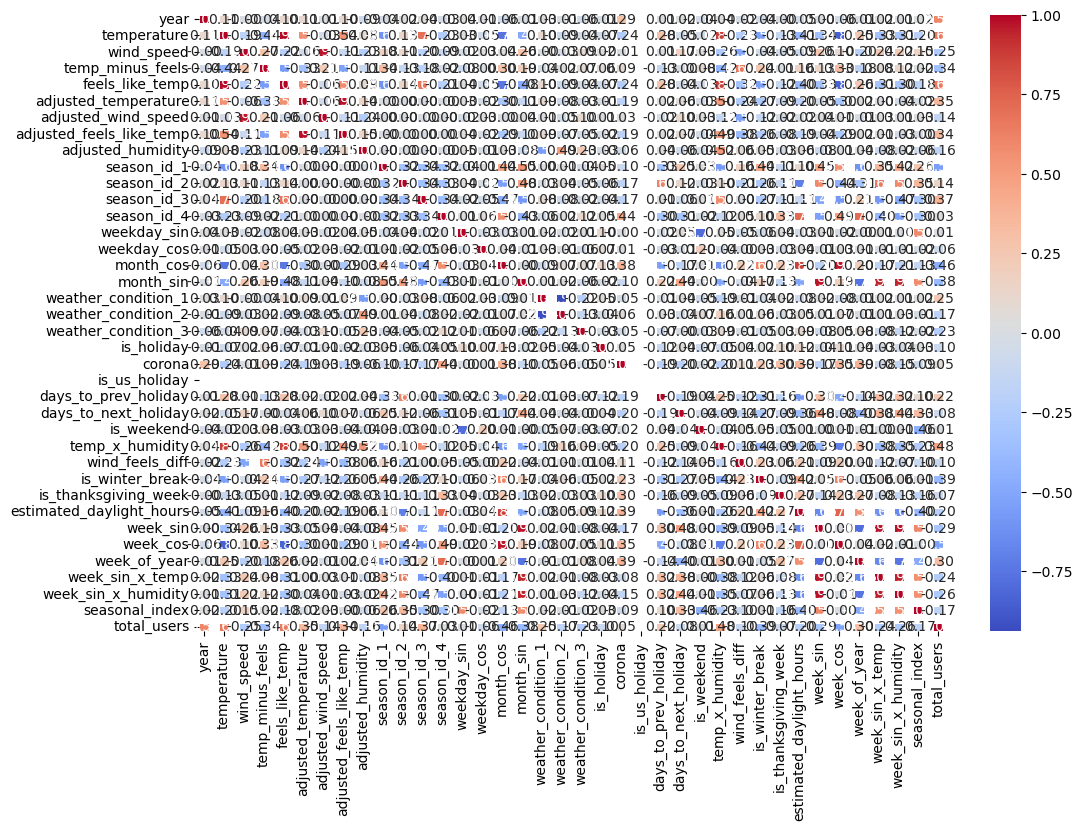

In [936]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df[final_features + ['total_users']].corr()

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.show()


In [937]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Train a Random Forest model to get feature importance
model = RandomForestRegressor(
                        n_estimators=best_i,
                        max_depth=best_d,
                        random_state=42,
                        n_jobs=-1,
                        verbose=0
                    )
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for easier interpretation
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Display the most important features
print(feature_importances.head(15))

                feature  importance
2           temperature    0.502932
0                  year    0.277011
8       feels_like_temp    0.112727
16    adjusted_humidity    0.024116
68      week_sin_x_temp    0.011452
70  week_sin_x_humidity    0.010450
62             week_sin    0.010396
42               corona    0.009919
66         week_of_year    0.008453
38  weather_condition_3    0.008050
6      temp_minus_feels    0.007957
34  weather_condition_1    0.003938
24          season_id_4    0.003082
18          season_id_1    0.002704
72       seasonal_index    0.001977


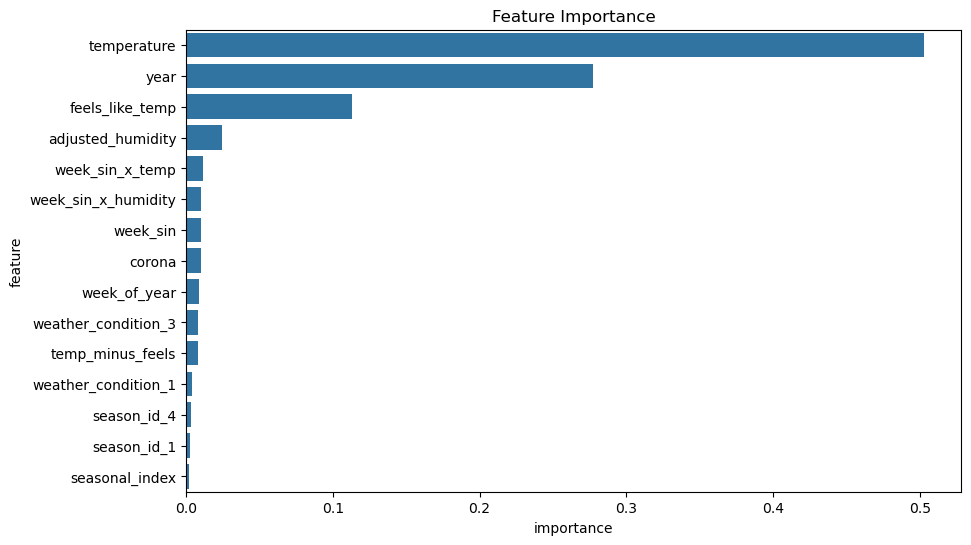

In [938]:
import matplotlib.pyplot as plt

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(15).sort_values(by='importance', ascending=False))
plt.title('Feature Importance')
plt.show()

In [939]:
important_features = feature_importances[feature_importances['importance'] > 0.001]
selected_features = important_features['feature'].tolist()
all_features = feature_importances['feature'].tolist()

In [940]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
                        n_estimators=best_i,
                        max_depth=best_d,
                        random_state=42,
                        n_jobs=-1,
                        verbose=0
                    )
cv_scores = cross_val_score(model, X_train[selected_features], y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_all = cross_val_score(model, X_train[all_features], y_train, cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validated MSE: {-cv_scores.mean():.2f}")
print(f"Cross-validated MSE: {-cv_scores_all.mean():.2f}")

Cross-validated MSE: 860694.24
Cross-validated MSE: 866760.40


In [941]:
print(len(selected_features))
print(len(feature_importances))
print(selected_features)

17
74
['temperature', 'year', 'feels_like_temp', 'adjusted_humidity', 'week_sin_x_temp', 'week_sin_x_humidity', 'week_sin', 'corona', 'week_of_year', 'weather_condition_3', 'temp_minus_feels', 'weather_condition_1', 'season_id_4', 'season_id_1', 'seasonal_index', 'wind_speed', 'temp_x_humidity']


# Generate Restults

In [1008]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df = pd.read_csv('./raw_data/regression-dataset-test-unlabeled.csv')
df['temp_minus_feels'] = df['temperature'] - df['feels_like_temp']
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)
df['temp_x_humidity'] = df['temperature'] * df['humidity']
df['wind_feels_diff'] = df['wind_speed'] * df['temp_minus_feels']
df['is_winter_break'] = df['month'].isin([12, 1]).astype(int)
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y")
df['is_thanksgiving_week'] = df['date'].dt.strftime('%m-%d').between('11-20', '11-30').astype(int)
df['estimated_daylight_hours'] = df['month'].apply(estimate_daylight_hours)
df = add_adjusted_column(df, 'temperature')
df = add_adjusted_column(df, 'humidity')
df = add_adjusted_column(df, 'wind_speed')
df = add_adjusted_column(df, 'feels_like_temp')
df = add_cyclical_feature(df, 'month', 12)
df = add_cyclical_feature(df, 'weekday', 7)
df = one_hot_encode_season(df, 'season_id')
df = one_hot_encode_season(df, 'weather_condition')
df = add_corona_data(df)
df = add_us_holidays(df)
df = add_holiday_distances(df)
df = add_week_cyclical_feature(df)
df['week_sin_x_temp'] = df['week_sin'] * df['temperature']
df['week_sin_x_humidity'] = df['week_sin'] * df['humidity']
df = add_seasonal_index(df)

In [1009]:
# chosen_features = ['temperature', 'year', 'feels_like_temp', 'adjusted_humidity', 'wind_feels_diff', 'week_sin_x_temp', 'week_sin', 'week_sin_x_humidity', 'temp_minus_feels', 'weather_condition_3', 'seasonal_index', 'temp_x_humidity', 'week_of_year', 'wind_speed', 'days_to_next_holiday', 'corona', 'days_to_prev_holiday', 'adjusted_wind_speed']

chosen_features = ['year','temperature', 'wind_speed', 'temp_minus_feels', 'feels_like_temp', 'adjusted_temperature',
                    'adjusted_wind_speed', 'adjusted_feels_like_temp', 'adjusted_humidity',
                    'season_id_1','season_id_2', 'season_id_3', 'season_id_4', 'weekday_sin', 'weekday_cos','month_cos', 'month_sin',
                   'weather_condition_1', 'weather_condition_2', 'weather_condition_3','is_holiday', 'corona', 'is_us_holiday',
                  'days_to_prev_holiday', 'days_to_next_holiday', 'is_weekend', 'temp_x_humidity', 'wind_feels_diff',
                  'is_winter_break', 'is_thanksgiving_week', 'estimated_daylight_hours', 'week_sin', 'week_cos', 'week_of_year',
                  'week_sin_x_temp', 'week_sin_x_humidity', 'seasonal_index']

x=1
for i in range(x):
    df = add_sqaured_feature(df, chosen_features, i)

final_features = []
for f in chosen_features:
    final_features.append(f)
    for i in range(x):
        final_features.append(f"{f}_{i}")



In [1010]:
df['prediction'] = xgb.predict(df[final_features])
output = df[['id', 'prediction']]
output.to_csv('predictions_new.csv', index=False)
print("Saved predictions to /mnt/data/predictions_new.csv")

Saved predictions to /mnt/data/predictions_new.csv
